# summary of our call with Namsoo today:
## 1)purpose of flight per number of engines
## 2)try different purpose of. flight per number of engines
## 3)which engine number is safer per fatality rates?
## 4) within that number of engines, which engine type is common and safer ?
## 5)which model/make is the safest per number of engines ? within that number of each type? which make/model is safe within each number of engines?
## 6)the top 5 most popular maker/model, which one has less fatality rate? 
## 7) engine number and engine type based on year 
## 8)for each engiene number , which model/maker is safe?

In [98]:
!ls

Airplane-Project          Namsoo.ipynb              airplane_purchase_project


In [99]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
df = pd.read_csv("airplane_purchase_project/AviationData.csv", encoding='latin-1')

/var/folders/sf/jkklx58940qbt_9v7c47hrgw0000gp/T/ipykernel_1502/1572144143.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("airplane_purchase_project/AviationData.csv", encoding='latin-1')


In [101]:
# clean dataset guidelines:
aviation = pd.read_csv("airplane_purchase_project/AviationData.csv", encoding='latin-1')

# 2008 - present
aviation["Year"] = aviation["Event.Date"].map(lambda x : x[:4] )
aviation["Year"] = aviation["Year"].astype(int)
aviation_2008 = aviation[aviation["Year"] >= 2008]

# Only Airplanes
airplane_2008 = aviation_2008[aviation_2008["Aircraft.Category"] == "Airplane"]

# All Injuries

# drop.na:
# engine numbers
airplane_2008 = airplane_2008.dropna(subset = "Number.of.Engines")

# engine types
airplane_2008 = airplane_2008.dropna(subset = "Engine.Type")

/var/folders/sf/jkklx58940qbt_9v7c47hrgw0000gp/T/ipykernel_1502/3236799044.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation = pd.read_csv("airplane_purchase_project/AviationData.csv", encoding='latin-1')


In [102]:
airplane_2008.shape

(16302, 32)

In [103]:
# Adding "Year" column
df["Year"] = df["Event.Date"].map(lambda x : x[:4] )

/var/folders/sf/jkklx58940qbt_9v7c47hrgw0000gp/T/ipykernel_1502/2273781203.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(years, rotation = 90)


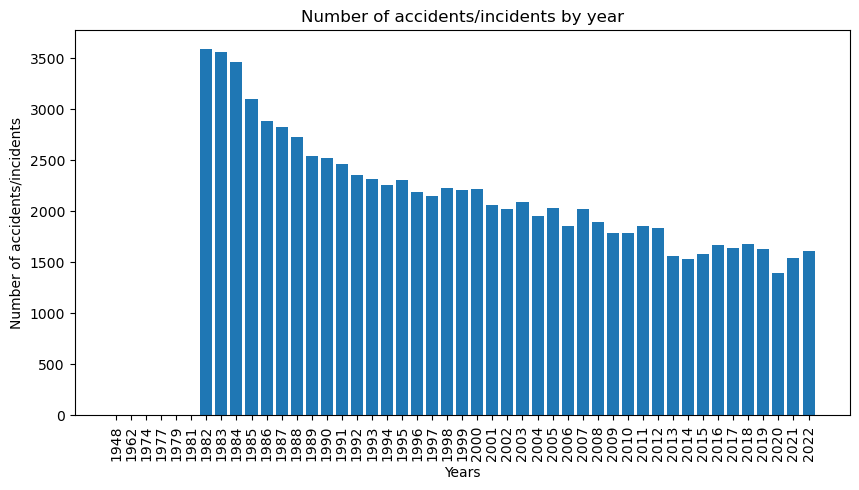

In [104]:
# Investigating frequency of accidents/incidents by year
years = df["Year"].value_counts().sort_index().index
fre_years = df["Year"].value_counts().sort_index().values

# Plotting
fig, ax = plt.subplots( figsize = (10, 5))
ax.bar(years, fre_years)
ax.set_xticklabels(years, rotation = 90)
ax.set_ylabel("Number of accidents/incidents")
ax.set_xlabel("Years")
ax.set_title("Number of accidents/incidents by year");

In [105]:
# Filtering out others than "Airplane" in "Aircraft.Category"
df_airplane = df[df["Aircraft.Category"] == "Airplane"]

# Adding a column of "Year"
df_airplane["Year"] = df_airplane["Event.Date"].map(lambda x : x[:4] )

/var/folders/sf/jkklx58940qbt_9v7c47hrgw0000gp/T/ipykernel_1502/2840862476.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airplane["Year"] = df_airplane["Event.Date"].map(lambda x : x[:4] )


/var/folders/sf/jkklx58940qbt_9v7c47hrgw0000gp/T/ipykernel_1502/4098252150.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(years2, rotation = 90)


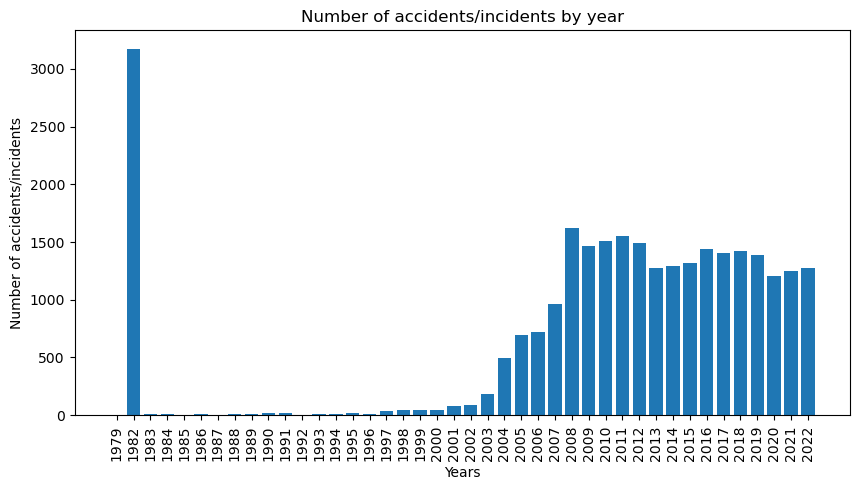

In [106]:
# Investigating frequency of accidents/incidents by year
years2 = df_airplane["Year"].value_counts().sort_index().index
fre_years2 = df_airplane["Year"].value_counts().sort_index().values

# Plotting
fig, ax = plt.subplots( figsize = (10, 5))
ax.bar(years2, fre_years2)
ax.set_xticklabels(years2, rotation = 90)
ax.set_ylabel("Number of accidents/incidents")
ax.set_xlabel("Years")
ax.set_title("Number of accidents/incidents by year");

/var/folders/sf/jkklx58940qbt_9v7c47hrgw0000gp/T/ipykernel_1502/2940863099.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(years, rotation = 90)


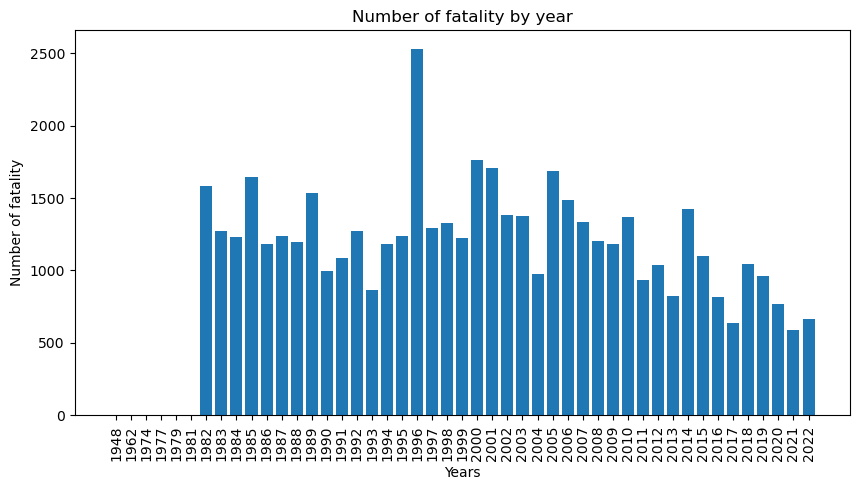

In [107]:
# Investigating fatality by year ----- need to change to graph
a_year = df.groupby("Year")["Total.Fatal.Injuries"].sum().index
fatality = df.groupby("Year")["Total.Fatal.Injuries"].sum().values

# Plotting
fig, ax = plt.subplots( figsize = (10, 5))
ax.bar(a_year, fatality)
ax.set_xticklabels(years, rotation = 90)
ax.set_ylabel("Number of fatality")
ax.set_xlabel("Years")
ax.set_title("Number of fatality by year");

In [108]:
# Percentage of Accidents/Incidents by Number of Engines
df["Number.of.Engines"].value_counts(normalize = True)

Number.of.Engines
1.0    0.840312
2.0    0.133796
0.0    0.014806
3.0    0.005833
4.0    0.005205
8.0    0.000036
6.0    0.000012
Name: proportion, dtype: float64

In [109]:
# Percentage of Accidents/Incidents by Engine Type
df["Engine.Type"].value_counts(normalize = True)

Engine.Type
Reciprocating      0.850073
Turbo Shaft        0.044124
Turbo Prop         0.041458
Turbo Fan          0.030333
Unknown            0.025075
Turbo Jet          0.008595
Geared Turbofan    0.000147
Electric           0.000122
LR                 0.000024
NONE               0.000024
Hybrid Rocket      0.000012
UNK                0.000012
Name: proportion, dtype: float64

In [110]:
df_engine = df[df["Number.of.Engines"] > 1]
df_engine["Number.of.Engines"].value_counts(normalize = True)

Number.of.Engines
2.0    0.923481
3.0    0.040260
4.0    0.035926
8.0    0.000250
6.0    0.000083
Name: proportion, dtype: float64

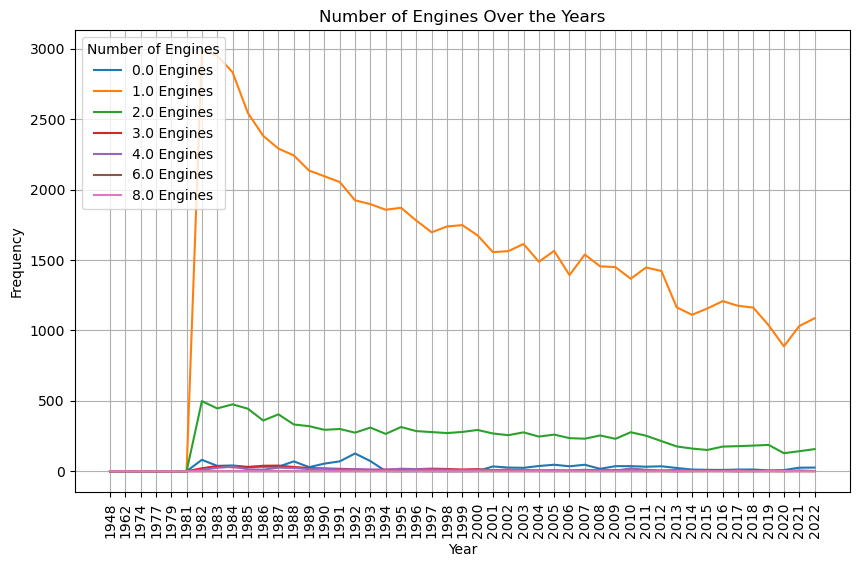

In [111]:
# Want to see engine number based on year 
# Pivot the DataFrame to have each unique number_of_engines as a separate column
pivot_df = df.pivot_table(index='Year', columns='Number.of.Engines', aggfunc='size', fill_value=0)

# Create a line plot for each column
plt.figure(figsize=(10, 6))
for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column], label=f'{column} Engines')

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Number of Engines Over the Years')
plt.legend(title='Number of Engines', loc='upper left')
plt.grid(True)
plt.xticks(rotation = 90)

# Show the plot
plt.show()

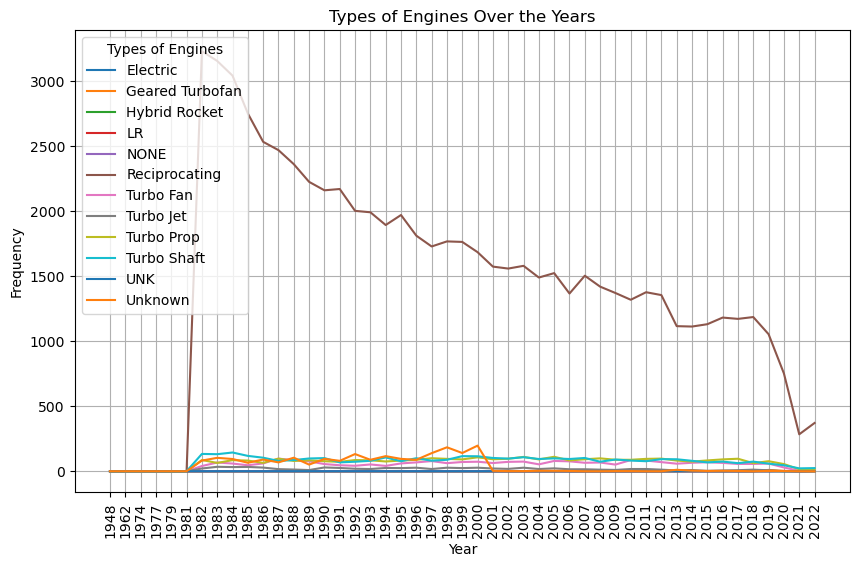

In [112]:
# Want to see engine type based on year 
# Pivot the DataFrame to have each unique number_of_engines as a separate column
pivot_df1 = df.pivot_table(index='Year', columns='Engine.Type', aggfunc='size', fill_value=0)

# Create a line plot for each column
plt.figure(figsize=(10, 6))
for column in pivot_df1.columns:
    plt.plot(pivot_df1.index, pivot_df1[column], label=f'{column}')

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Types of Engines Over the Years')
plt.legend(title='Types of Engines', loc='upper left')
plt.grid(True)
plt.xticks(rotation = 90)

# Show the plot
plt.show()